In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Internship/DataVisualization_week2_CSV.csv')

df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,2023-06-14 12:36:09,11/03/2022 18:30:39,24
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,2023-05-01 06:08:21,11/03/2022 18:30:39,25
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,NaN,11/03/2022 18:30:39,23
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-11-01,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,2023-10-09 22:02:42,11/03/2022 18:30:39,26
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,2023-01-06 15:40:10,11/03/2022 18:30:39,25


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# List of categorical features to encode
categorical_cols = ["Gender", "Country", "Institution Name", "Current/Intended Major", "Opportunity Category"]

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
print(df.columns)


Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Date of Birth', 'Gender', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Description',
       'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age'],
      dtype='object')


In [ ]:
# Convert 'Status Description' into a binary target variable
df["Dropout_Label"] = df["Status Description"].apply(lambda x: 1 if x == "Dropped Out" else 0)

# Verify that it was created
print(df["Dropout_Label"].value_counts())

Dropout_Label
0    7941
1     617
Name: count, dtype: int64


In [ ]:
features = ["Gender", "Country", "Institution Name", "Current/Intended Major",
            "Opportunity Category", "Age", "Status Code"]

X = df[features]
y = df["Dropout_Label"]

In [ ]:
from sklearn.impute import SimpleImputer

# fill missing categorical values with 'Unknown'
X.fillna("Unknown", inplace=True)

# convert categorical data to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

<ipython-input-8-bd88d4389ad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna("Unknown", inplace=True)


In [ ]:
# split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(classification_rep_rf)

Random Forest Accuracy: 99.94%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1589
           1       1.00      0.99      1.00       123

    accuracy                           1.00      1712
   macro avg       1.00      1.00      1.00      1712
weighted avg       1.00      1.00      1.00      1712



In [ ]:
train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, train_pred_rf)

print(f"Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_rf * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 99.94%


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=5, class_weight="balanced",
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [ ]:
train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, train_pred_rf)

test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_pred_rf)

print(f"Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 99.94%


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=50, max_depth=5,  # reduced depth
    min_samples_split=10, min_samples_leaf=5,  # prevents too small nodes
    class_weight="balanced", random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [ ]:
features = ["Gender", "Country", "Institution Name", "Current/Intended Major",
            "Opportunity Category", "Age", "Status Code"]

X_selected = df[features]  # Select specific columns

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# categorical columns
categorical_features = ["Gender", "Country", "Current/Intended Major", "Opportunity Category", "Status Code"]

# apply One-Hot Encoding to categorical variables
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

# transform X_train and X_test
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5,
    class_weight="balanced", random_state=42
)
rf_model.fit(X_train_encoded, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# make predictions
y_pred = rf_model.predict(X_test_encoded)

# evaluate performance
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1589
           1       1.00      1.00      1.00       123

    accuracy                           1.00      1712
   macro avg       1.00      1.00      1.00      1712
weighted avg       1.00      1.00      1.00      1712



In [ ]:
import numpy as np

# feature names from encoder
feature_names = encoder.get_feature_names_out()
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("Top 10 Important Features:")
for i in sorted_indices[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Top 10 Important Features:
cat__Status Code_1050: 0.1741
cat__Status Code_1070: 0.1499
cat__Status Code_1030: 0.1426
cat__Opportunity Category_4: 0.1205
cat__Opportunity Category_1: 0.1052
cat__Opportunity Category_3: 0.0516
cat__Status Code_1080: 0.0463
remainder__Age: 0.0418
cat__Opportunity Category_0: 0.0297
cat__Status Code_1010: 0.0188


In [ ]:
# drop 'Status Code' from features
X_selected = X_selected.drop(columns=[col for col in X_selected.columns if "Status Code" in col], errors="ignore")

# re-split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# retrain Random Forest
rf_model.fit(X_train, y_train)

# evaluate
y_pred = rf_model.predict(X_test)

new_accuracy = accuracy_score(y_test, y_pred)
print(f"New Testing Accuracy (after removing Status Code): {new_accuracy * 100:.2f}%")
print("Updated Classification Report:")
print(classification_report(y_test, y_pred))

New Testing Accuracy (after removing Status Code): 50.29%
Updated Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.47      0.63      1576
           1       0.13      0.89      0.22       136

    accuracy                           0.50      1712
   macro avg       0.55      0.68      0.43      1712
weighted avg       0.91      0.50      0.60      1712



In [ ]:
# convert dates safely, handling errors
df["Apply Date"] = pd.to_datetime(df["Apply Date"], errors="coerce")
df["Learner SignUp DateTime"] = pd.to_datetime(df["Learner SignUp DateTime"], errors="coerce")

# check for rows where the date conversion failed
invalid_dates = df[df["Apply Date"].isna() | df["Learner SignUp DateTime"].isna()]
print("Rows with invalid dates:\n", invalid_dates)


Rows with invalid dates:
      Learner SignUp DateTime                  Opportunity Id  \
2        2023-04-09 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
51                       NaT  00000000-0GN2-A0AY-7XK8-C5FZPP   
93                       NaT  00000000-0GN2-A0AY-7XK8-C5FZPP   
139                      NaT  00000000-0GN2-A0AY-7XK8-C5FZPP   
143      2023-07-07 23:05:55  00000000-0GN2-A0AY-7XK8-C5FZPP   
...                      ...                             ...   
8477                     NaT  00000000-10GQ-RJHT-3G4S-BKGBY1   
8494                     NaT  00000000-10GQ-RJHT-3G4S-BKGBY1   
8509                     NaT  00000000-10GQ-RJHT-3G4S-BKGBY1   
8539                     NaT  00000000-10GQ-RJHT-3G4S-BKGBY1   
8548                     NaT  00000000-10GQ-RJHT-3G4S-BKGBY1   

                                       Opportunity Name  Opportunity Category  \
2     Career Essentials: Getting Started with Your P...                     1   
51    Career Essentials: Getting Started wi

In [ ]:
df = df.dropna(subset=["Apply Date", "Learner SignUp DateTime"])


In [ ]:
# fill missing dates with the minimum available date
min_signup_date = df["Learner SignUp DateTime"].min()
min_apply_date = df["Apply Date"].min()

# ensure df is a direct reference to avoid chained assignment issues
df = df.copy()

# fill missing dates safely
df.loc[:, "Learner SignUp DateTime"] = df["Learner SignUp DateTime"].fillna(min_signup_date)
df.loc[:, "Apply Date"] = df["Apply Date"].fillna(min_apply_date)


In [ ]:
df["Signup_to_Apply_Days"] = (pd.to_datetime(df["Apply Date"]) - pd.to_datetime(df["Learner SignUp DateTime"])).dt.days


In [ ]:
df["Signup_Year"] = pd.to_datetime(df["Learner SignUp DateTime"]).dt.year
df["Signup_Month"] = pd.to_datetime(df["Learner SignUp DateTime"]).dt.month
df["Apply_Year"] = pd.to_datetime(df["Apply Date"]).dt.year
df["Apply_Month"] = pd.to_datetime(df["Apply Date"]).dt.month


In [ ]:
print(df.isnull().sum())


Learner SignUp DateTime    0
Opportunity Id             0
Opportunity Name           0
Opportunity Category       0
Opportunity End Date       0
First Name                 0
Date of Birth              0
Gender                     0
Country                    0
Institution Name           0
Current/Intended Major     0
Entry created at           0
Status Description         0
Status Code                0
Apply Date                 0
Opportunity Start Date     0
Age                        0
Dropout_Label              0
Signup_to_Apply_Days       0
Signup_Year                0
Signup_Month               0
Apply_Year                 0
Apply_Month                0
dtype: int64


In [ ]:
# select updated features
features = ["Gender", "Country", "Current/Intended Major", "Opportunity Category",
            "Age", "Signup_to_Apply_Days", "Signup_Year", "Signup_Month", "Apply_Year", "Apply_Month"]
X = df[features]
y = df["Dropout_Label"]

# train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = rf_model.predict(X_test)

print(f"New Testing Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Updated Classification Report:")
print(classification_report(y_test, y_pred))


New Testing Accuracy: 84.17%
Updated Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1493
           1       0.28      0.79      0.41       112

    accuracy                           0.84      1605
   macro avg       0.63      0.82      0.66      1605
weighted avg       0.93      0.84      0.87      1605



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model again if it's missing
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

print("Model retrained successfully.")

Model retrained successfully.


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "random_forest_model.pkl")

print("Model saved successfully.")

Model saved successfully.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

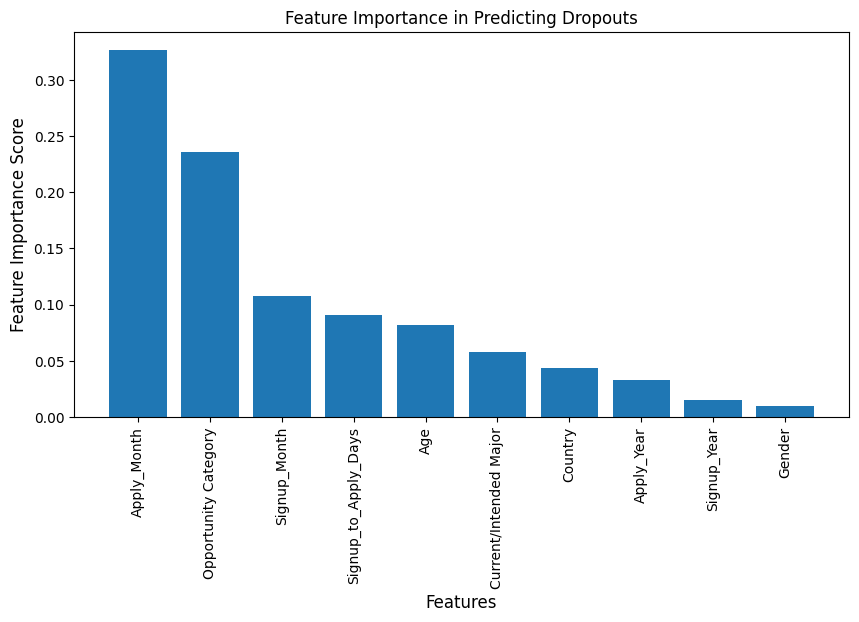

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance in Predicting Dropouts")
plt.bar(range(len(X.columns)), importances[indices], align="center")
plt.ylabel("Feature Importance Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(range(len(X.columns)), [X.columns[i] for i in indices], rotation=90)
plt.show()

In [ ]:
# time between sign-up and first application
df["Signup_to_Apply_Days"] = (df["Apply Date"] - df["Learner SignUp DateTime"]).dt.days

# number of applications per student (engagement level)
df["Total_Applications"] = df.groupby("First Name")["Opportunity Id"].transform("count")

# opportunity completion rate
df["Completed_Opportunities"] = df["Status Description"].apply(lambda x: 1 if x == "Completed" else 0)
df["Completion_Rate"] = df.groupby("First Name")["Completed_Opportunities"].transform("mean")

# normalize the engagement scores (scaling between 0 and 1)
df["Engagement_Score"] = (df["Total_Applications"] * 0.4) + (df["Completion_Rate"] * 0.4) + (df["Signup_to_Apply_Days"] * -0.2)

# categorize engagement levels
df["Engagement_Level"] = pd.cut(df["Engagement_Score"], bins=[-np.inf, 0.3, 0.7, np.inf], labels=["Low", "Medium", "High"])

print(df[["First Name", "Total_Applications", "Completion_Rate", "Engagement_Score", "Engagement_Level"]].head())

         First Name  Total_Applications  Completion_Rate  Engagement_Score  \
0             Faria                   1              0.0               0.4   
1          Poojitha                  10              0.0               4.0   
3  Amrutha Varshini                  12              0.0              -3.4   
4    Vinay Varshith                   1              0.0               0.4   
5               Mor                   3              0.0               1.2   

  Engagement_Level  
0           Medium  
1             High  
3              Low  
4           Medium  
5             High  


In [ ]:
# Include Engagement Score in features
features = ["Gender", "Country", "Institution Name", "Current/Intended Major",
            "Opportunity Category", "Age", "Status Code", "Engagement_Score"]

X = df[features]
y = df["Dropout_Label"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model with engagement score included
model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"New Accuracy with Engagement Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Updated Classification Report:\n", classification_report(y_test, y_pred))

New Accuracy with Engagement Score: 99.94%
Updated Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1488
           1       1.00      0.99      1.00       117

    accuracy                           1.00      1605
   macro avg       1.00      1.00      1.00      1605
weighted avg       1.00      1.00      1.00      1605



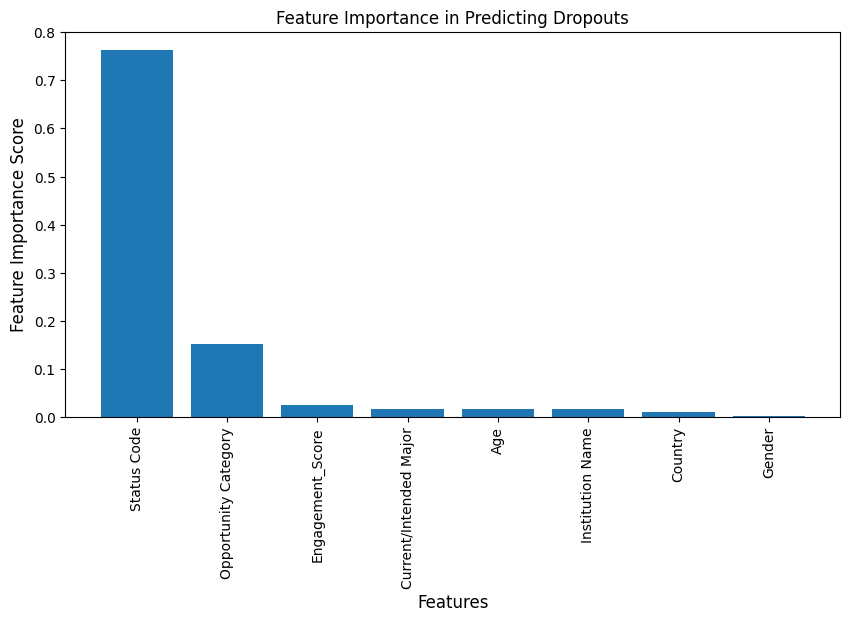

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.title("Feature Importance in Predicting Dropouts")
plt.ylabel("Feature Importance Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.show()

In [ ]:
features.remove("Status Code")  # Remove the possibly leaked feature
X = df[features]

# Retrain model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"New Accuracy after Removing Status Code: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Updated Classification Report:\n", classification_report(y_test, y_pred))

New Accuracy after Removing Status Code: 60.56%
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.74      1488
           1       0.12      0.71      0.21       117

    accuracy                           0.61      1605
   macro avg       0.54      0.65      0.47      1605
weighted avg       0.90      0.61      0.70      1605



In [ ]:
# Assuming 'X' contains features and 'y' is the target variable (dropout or not)
# Encode categorical variables
from imblearn.over_sampling import SMOTE
categorical_cols = ['Opportunity Category', 'Current/Intended Major', 'Institution Name', 'Country', 'Gender']
X_encoded = X.copy()

for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Updated Classification Report:\n", classification_report(y_test, y_pred))


Final Model Accuracy: 92.57%
Updated Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1488
           1       0.90      0.95      0.93      1488

    accuracy                           0.93      2976
   macro avg       0.93      0.93      0.93      2976
weighted avg       0.93      0.93      0.93      2976



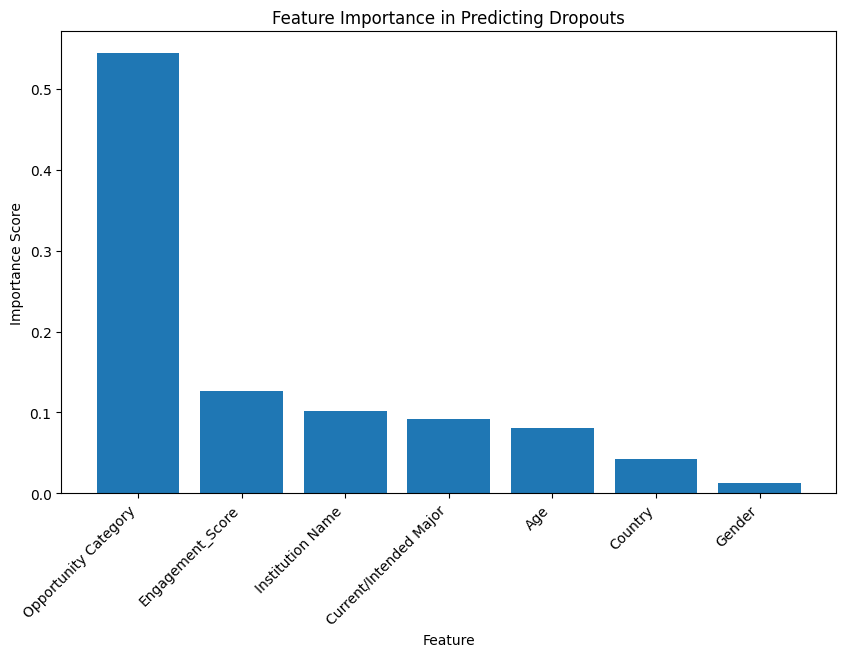

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names (assuming you have a DataFrame X)
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance in Predicting Dropouts")
plt.show()